In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Embedding
from tensorflow.keras import Sequential
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'1.13.1'

In [3]:
# 按照固定区间长度绘制频率分布直方图
# bins_interval 区间的长度
# margin        设定的左边和右边空留的大小
def probability_distribution(data, bins_interval=1, margin=1):
    bins = range(min(data), max(data) + bins_interval - 1, bins_interval)
    print(len(bins))
    for i in range(0, len(bins)):
        print(bins[i])
    plt.xlim(min(data) - margin, max(data) + margin)
    plt.title("Probability-distribution")
    plt.xlabel('Interval')
    plt.ylabel('Probability')
    # 频率分布normed=True，频次分布normed=False
    prob,left,rectangle = plt.hist(x=data, bins=bins, normed=True, histtype='bar', color=['r'])
    for x, y in zip(left, prob):
        # 字体上边文字
        # 频率分布数据 normed=True
        plt.text(x + bins_interval / 2, y + 0.003, '%.2f' % y, ha='center', va='top')
        # 频次分布数据 normed=False
        # plt.text(x + bins_interval / 2, y + 0.25, '%.2f' % y, ha='center', va='top')
    plt.show()

In [4]:
origin_data = pd.read_csv("/Users/bytedance/LearningProjects/practice_shouqianba/timedata.txt", sep='\t')

NameError: name 'pd' is not defined

In [ ]:
#======================= Deal Input

In [5]:
import pandas as pd

In [6]:
data = pd.read_csv("/Users/bytedance/LearningProjects/practice_shouqianba/timedata.txt", sep='\t')
data['satis'] = data['satis'] - 1


6
0
1
2
3
4
5


/Users/bytedance/miniconda3/envs/tf1/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


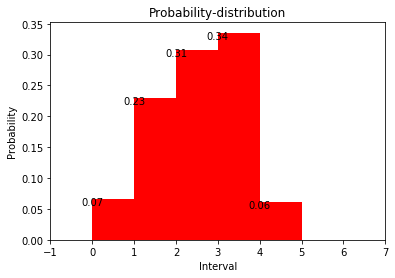

In [7]:
probability_distribution(list(data['satis']))

In [8]:
for i in range(7):
    print '==== summary ========'
    print i, sum(data['satis'] == i)
    print '==== summary ========'

==== summary ========
0 84
==== summary ========
==== summary ========
1 289
==== summary ========
==== summary ========
2 388
==== summary ========
==== summary ========
3 423
==== summary ========
==== summary ========
4 65
==== summary ========
==== summary ========
5 12
==== summary ========
==== summary ========
6 11
==== summary ========


In [9]:
def convert_label(val):
    if val <= 1:
        return 0
    if val == 2:
        return 1
    if val >= 3:
        return 2
    else:
        return 2

def convert_seniorcare(val):
    if val == 2:
        return 1
    else:
        return val

def convert_edu(val):
    if val > 5:
        return val - 5
    else:
        return val

def convert_comp(val):
    return val - 29

def get_numeric_idx(colnames, data):
    idx_lis = []
    for colname in colnames:
        idx = list(data.columns).index(colname)
        idx_lis.append(idx)
    return idx_lis

def get_numeric_input(line, numeric_idx_lis):
    return [float(line[idx]) for idx in numeric_idx_lis]

In [40]:
# ----------------------- Must: convert x

3.0

In [11]:
seniorcare = []
for val in list(data['seniorcare']):
    seniorcare.append(convert_seniorcare(val))
data['seniorcare'] = seniorcare

In [12]:
edu = []
for val in list(data['edu']):
    edu.append(convert_edu(val))
data['edu'] = edu

In [13]:
for colname in data.columns:
    if 'Comp' in colname:
        data[colname] = data[colname] - 29

In [14]:
# ----------------------- Optional: if convert label
satis_label = []
for val in list(data['satis']):
    satis_label.append(convert_label(val))
data['satis'] = satis_label

In [ ]:
# ----------------------- Optional: if convert label

In [15]:
data.to_csv("/Users/bytedance/LearningProjects/practice_shouqianba/timewhole.txt", index=False)
data = pd.read_csv("/Users/bytedance/LearningProjects/practice_shouqianba/timewhole.txt")

In [16]:
data.columns

Index([u'NO', u'gender', u'age', u'edu', u'occupied', u'employer',
       u'employform', u'industry', u'housekepper', u'seniorcare',
       ...
       u'Comp2 39', u'Comp2 40', u'Comp2 41', u'Comp2 42', u'Comp2 43',
       u'Comp2 44', u'Comp2 45', u'Comp2 46', u'Comp2 47', u'Comp2 48'],
      dtype='object', length=205)

In [17]:
print list(data.columns).index("satis")
print list(data.columns).index("Act1 1")
print list(data.columns).index("Act1 48")

12
13
60


In [18]:
for line in open("/Users/bytedance/LearningProjects/practice_shouqianba/timewhole.txt", 'r'):
    line = [_ for _ in line.split(',')[:]]
    print line[list(data.columns).index("satis"):list(data.columns).index("Act1 48") + 1]
    break

['satis', 'Act1 1', 'Act1 2', 'Act1 3', 'Act1 4', 'Act1 5', 'Act1 6', 'Act1 7', 'Act1 8', 'Act1 9', 'Act1 10', 'Act1 11', 'Act1 12', 'Act1 13', 'Act1 14', 'Act1 15', 'Act1 16', 'Act1 17', 'Act1 18', 'Act1 19', 'Act1 20', 'Act1 21', 'Act1 22', 'Act1 23', 'Act1 24', 'Act1 25', 'Act1 26', 'Act1 27', 'Act1 28', 'Act1 29', 'Act1 30', 'Act1 31', 'Act1 32', 'Act1 33', 'Act1 34', 'Act1 35', 'Act1 36', 'Act1 37', 'Act1 38', 'Act1 39', 'Act1 40', 'Act1 41', 'Act1 42', 'Act1 43', 'Act1 44', 'Act1 45', 'Act1 46', 'Act1 47', 'Act1 48']


In [19]:
set(list(data['satis']))

{0, 1, 2}

In [20]:
list(data.columns).index("Comp1 1")
list(data.columns).index("Comp1 48")

108

In [21]:
set(list(data['Comp1 1']))

{1, 2, 3, 4}

In [22]:
set(list(data['Act1 1']))

{1, 2, 5, 6, 7, 10, 16, 17, 18, 23, 25, 29}

In [39]:
#======================= Input

In [23]:
print weekday_act_start_index, weekend_act_start_index

NameError: name 'weekday_act_start_index' is not defined

In [24]:
#---------------------------- 读入数据 ------------------
data_source = "/Users/bytedance/LearningProjects/practice_shouqianba/timewhole.txt"

raw_inputs = []
raw_comp_inputs = []
raw_weekend_inputs = []
raw_weekend_comp_inputs = []
raw_numeric_inputs = []
raw_labels = []
line_idx = 0

label_index = list(data.columns).index("satis")
weekday_act_start_index = list(data.columns).index("Act1 1")
weekday_act_end_index = list(data.columns).index("Act1 48") + 1
weekday_companion_start_index = list(data.columns).index("Comp1 1")
weekday_companion_end_index = list(data.columns).index("Comp1 48") + 1

weekend_act_start_index = list(data.columns).index("Act2 1")
weekend_act_end_index = list(data.columns).index("Act2 48") + 1
weekend_companion_start_index = list(data.columns).index("Comp2 1")
weekend_companion_end_index = list(data.columns).index("Comp2 48") + 1

numeric_colnames = ["gender", "age", "edu", "housekepper", "seniorcare", "childcare", "income"]

numeric_idxs = get_numeric_idx(numeric_colnames, data)

for line in open(data_source, 'r'):
    if line_idx == 0:
        line_idx += 1
        continue
    
    line_ = line.split(',')
    
    line_inputs = [int(_) for _ in line_[weekday_act_start_index:weekday_act_end_index]]
    line_comp_inputs = [int(_) for _ in line_[weekday_companion_start_index:weekday_companion_end_index]]
    line_weekend_inputs = [int(_) for _ in line_[weekend_act_start_index:weekend_act_end_index]]
    line_weekend_comp_inputs = [int(_) for _ in line_[weekend_companion_start_index:weekend_companion_end_index]]
    line_numeric_inputs = get_numeric_input(line_, numeric_idxs)
    
    line_label = int(line_[label_index])
    # line_label = np.random.randint(0,2) #生成label

    raw_inputs.append(line_inputs)
    raw_comp_inputs.append(line_comp_inputs)
    raw_weekend_inputs.append(line_weekend_inputs)
    raw_weekend_comp_inputs.append(line_weekend_comp_inputs)

    raw_numeric_inputs.append(line_numeric_inputs)
    raw_labels.append(line_label)
    line_idx += 1

ACTION_TYPE_NUM = 29
COMPANION_TYPE_NUM = 4
LABEL_CLASSES = 3
TIME_SLOT_NUM = 48
NUMERIC_FEATURE_NUM = len(numeric_colnames)

In [25]:
for colname in numeric_colnames:
    print set(list(data[colname]))
numeric_idxs

set([1, 2])
set([1, 2, 3, 4, 5, 6, 7])
set([1, 2, 3, 4, 5])
set([1, 2])
set([1, 3])
set([1, 2])
set([1, 2, 3, 4, 5, 6, 7, 8, 9])


[1, 2, 3, 8, 9, 10, 11]

In [ ]:
#---------------------------- 转化得到训练模型需要的数据格式 ------------------

In [26]:
raw_inputs = np.array(raw_inputs)
raw_comp_inputs = np.array(raw_comp_inputs)
raw_weekend_inputs = np.array(raw_weekend_inputs)
raw_weekend_comp_inputs = np.array(raw_weekend_comp_inputs)
raw_numeric_inputs = np.array(raw_numeric_inputs)

raw_labels = np.array(raw_labels)
raw_time_inputs = [[i+1 for i in range(48)]] * raw_inputs.shape[0]
raw_time_inputs = np.array(raw_time_inputs)

raw_labels = np.eye(LABEL_CLASSES)[raw_labels]

In [27]:
print raw_inputs[0:2]# input 48个动作
print raw_weekend_inputs[0:2]# input 48个动作

print raw_numeric_inputs[0:2]
print raw_time_inputs[0:2]

print "============================="
print raw_labels[0:2]
print "============================="
print raw_inputs.shape, raw_labels.shape

[[ 5  5  5  5  5  5  5  5  5  5  5  5  6  3  3  3  3  3  3  3  3  3  3  3
  12 11  6  5  3  3  3  3  3  3 11 14  6 18 18 18 18  7  5  5  5  5  5  5]
 [ 5  5  5  5  5  5  5  5  5  5  5  5  5  7  7 29 29  1  1  1  1  1  1  1
   6  6  1  1  1  1  1  1  1  1  1  9  6  6 23 23 23 23 23  7  5  5  5  5]]
[[ 5  5  5  5  5  5  5  5  5  5  5 11  6 14 25 25  3  3  3  3  3  3 10 11
   6 25  3  3  3  3  3  3  3  3  3 11  6 23 23 23 23 23 23 23  5  5  5  5]
 [ 5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  6  6
  23 23 23 23 23 23 23 23 23 23 23 23 23 23  6 23 23 23 23 23 23  5  5  5]]
[[2. 6. 1. 2. 3. 2. 4.]
 [2. 2. 4. 2. 1. 2. 8.]]
[[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
  25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
  25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48]]
[[1. 0. 0.]
 [0. 0. 1.]]
(1272, 48) (1272, 3)


In [ ]:
1. 1597行数据，每行输入是48维（每半小时1维）的动作 id
2. raw_labels: 2维，在第0个位置 值为1 则 label = 0，在第一个位置值为1 则 label = 1


In [ ]:
#---------------------------- 转化得到训练模型需要的数据格式 ------------------

In [ ]:
#---------------------------- 指定模型维度的一些常数 ------------------

In [28]:
all_inps = []
for inp in raw_inputs:
    for val in inp:
        all_inps.append(val)
print set(all_inps)

set([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])


In [ ]:
#---------------------------- 29项活动，平时/周末 有多少人做

In [35]:
raw_inputs

array([[ 5,  5,  5, ...,  5,  5,  5],
       [ 5,  5,  5, ...,  5,  5,  5],
       [ 2,  2,  2, ...,  5,  5,  5],
       ...,
       [ 5,  5,  5, ...,  7,  7,  7],
       [ 5,  5,  5, ..., 17,  5,  5],
       [ 5,  5,  5, ...,  5,  5,  5]])

In [42]:
for i in range(29):
    print sum(np.sum(raw_inputs == (i+1), axis = 1) > 0)

1217
299
143
1098
1270
1261
1170
31
141
125
319
172
157
186
89
284
116
345
41
37
6
185
334
118
412
74
1
9
173


In [43]:
for i in range(29):
    print sum(np.sum(raw_weekend_inputs == (i+1), axis = 1) > 0)

99
67
99
143
1268
1257
1170
45
161
422
588
548
243
457
149
342
147
626
45
86
27
407
569
222
403
119
4
119
290


In [ ]:
#---------------------------- 29项活动，平时/周末 多长时间

In [ ]:
#------------ 工作日

In [29]:
for i in range(29):
    print np.sum(raw_inputs == (i+1))

19719
1166
750
4136
20546
4290
2381
51
234
193
553
240
509
344
262
752
251
1068
84
100
13
362
1227
241
852
206
5
17
504


In [ ]:
#------------ 周末

In [31]:
for i in range(29):
    print np.sum(raw_weekend_inputs == (i+1))

1539
670
779
545
24766
4968
2465
131
420
1380
1626
1196
1920
1276
695
1416
513
3489
111
440
130
1479
4121
729
1403
628
32
687
1502


In [45]:
fid_type_to_fid_size = {
    "action_type": ACTION_TYPE_NUM + 1,
    "comp_type": COMPANION_TYPE_NUM + 1,
    "time_slot": TIME_SLOT_NUM + 1,
}
EMBEDDING_DIM = 4


In [ ]:
#====================== test

In [58]:
#=============== 值得优化的待优化代码

with tf.Session() as sess: 
    #========== 每行 Input  是 TIME_SLOT_NUM = 48维的两个向量，Label 是 LABEL_CLASSES = 2 维的两个输出
    inputs = tf.keras.Input(shape=(TIME_SLOT_NUM, ), dtype="int64")
    comp_inputs = tf.keras.Input(shape=(TIME_SLOT_NUM, ), dtype="int64")
    weekend_inputs = tf.keras.Input(shape=(TIME_SLOT_NUM, ), dtype="int64")
    weekend_comp_inputs = tf.keras.Input(shape=(TIME_SLOT_NUM, ), dtype="int64")
    
    time_inputs = tf.keras.Input(shape=(TIME_SLOT_NUM, ), dtype="int64")
    numeric_inputs = tf.keras.Input(shape=(NUMERIC_FEATURE_NUM, ), dtype="float32")
    labels = tf.keras.Input(shape=(LABEL_CLASSES, ), dtype="float32")

    #========== EMBEDDING_DIM = 4维 Embedding，把每行 48个输入映射成 (48, 4)
    action_matrix=Embedding(
        fid_type_to_fid_size["action_type"], EMBEDDING_DIM
    )
    comp_matrix=Embedding(
        fid_type_to_fid_size["comp_type"], EMBEDDING_DIM
    )
    
    action_emb = action_matrix(inputs)
    comp_emb = comp_matrix(comp_inputs)
    weekend_action_emb = action_matrix(weekend_inputs)
    weekend_comp_emb = action_matrix(weekend_comp_inputs)
    
    time_emb = Embedding(
        fid_type_to_fid_size["time_slot"], EMBEDDING_DIM
    )(time_inputs)

    
    print 'emb', time_emb.shape
    
    #========== 直接摊平 48 * 4 = 192 维 embedding，时间的192维 & action_type 的192维做内积
    action_concat_emb = tf.keras.layers.Flatten()(action_emb)
    comp_concat_emb = tf.keras.layers.Flatten()(comp_emb)
    weekend_action_concat_emb = tf.keras.layers.Flatten()(weekend_action_emb)
    weekend_comp_concat_emb = tf.keras.layers.Flatten()(weekend_comp_emb)
    
    time_concat_emb = tf.keras.layers.Flatten()(time_emb)
    
    print 'concat_emb', action_concat_emb.shape, time_concat_emb.shape
    
    logits = tf.concat([
        tf.multiply(action_concat_emb, time_concat_emb),
        tf.multiply(comp_concat_emb, time_concat_emb),
        tf.multiply(weekend_action_concat_emb, time_concat_emb),
        tf.multiply(weekend_comp_concat_emb, time_concat_emb),
    ],axis=1)
    logits_final = tf.reduce_sum(logits, axis=1, keepdims=True)
    
    #=========== 最后需要输出两个label 过一个Dense层把一个logit值映射到 2 个值上，再过一层softmax转化为概率值
    prediction_act_comp = tf.keras.layers.Dense(LABEL_CLASSES, activation=None)(logits_final)
    numeric_layer = tf.keras.layers.Dense(LABEL_CLASSES, activation=None)
    prediction_numeric = numeric_layer(numeric_inputs)

    prediction = tf.nn.softmax(prediction_act_comp + prediction_numeric)
    # prediction = tf.nn.softmax(prediction_numeric)
    
    print 'logit shape', logits.shape, logits_final.shape, prediction.shape
    print labels.shape
    
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=prediction, labels=labels))
    train_optim = tf.train.AdamOptimizer().minimize(loss) # 训网络
    init = tf.global_variables_initializer()
    sess.run(init)

    for _ in range(3000):
        sess.run(train_optim, feed_dict={
            inputs: raw_inputs, comp_inputs: raw_comp_inputs,
            weekend_inputs: raw_weekend_inputs, weekend_comp_inputs: raw_weekend_comp_inputs,
            time_inputs: raw_time_inputs, numeric_inputs: raw_numeric_inputs,
            labels: raw_labels
        })
        if _ % 500 == 0:
            print sess.run(loss, feed_dict={
                inputs: raw_inputs, comp_inputs: raw_comp_inputs,
                weekend_inputs: raw_weekend_inputs, weekend_comp_inputs: raw_weekend_comp_inputs,
                time_inputs: raw_time_inputs, numeric_inputs: raw_numeric_inputs,
                labels: raw_labels
            })


    final_ret = sess.run(prediction, feed_dict={
        inputs: raw_inputs, comp_inputs: raw_comp_inputs,
        weekend_inputs: raw_weekend_inputs, weekend_comp_inputs: raw_weekend_comp_inputs,
        time_inputs: raw_time_inputs, numeric_inputs: raw_numeric_inputs
    })
    final_analysis = sess.run(
        logits, feed_dict={
            inputs: raw_inputs, comp_inputs: raw_comp_inputs,
            weekend_inputs: raw_weekend_inputs, weekend_comp_inputs: raw_weekend_comp_inputs,
            time_inputs: raw_time_inputs
        }
    )
#     weight_analysis = sess.run(
#         logits, feed_dict={
#             inputs: raw_inputs, comp_inputs: raw_comp_inputs,
#             time_inputs: raw_time_inputs
#         }
#     )
    
    table_input = np.array([list(np.array(range(29)) + 1) + [1] * 19])
    action_emb_table = sess.run(action_emb, feed_dict={inputs: table_input})
#     print sess.run(action_concat_emb, feed_dict={inputs: raw_inputs})

emb (?, 48, 4)
concat_emb (?, 192) (?, 192)
logit shape (?, 768) (?, 1) (?, 3)
(?, 3)
0.76143134
0.7158288
0.6850155
0.6760969
0.6736103
0.6726477


In [60]:
numeric_layer.get_weights()[0]

array([[-0.7545672 , -0.46335864, -0.76679033],
       [-0.6434724 , -0.07518214, -0.64590514],
       [-0.4478403 , -0.658989  , -0.6961552 ],
       [ 0.76844454, -0.42839682,  0.3863293 ],
       [-0.73458505, -0.04746658, -0.6953465 ],
       [-0.15188587, -0.34801766,  0.5125421 ],
       [ 0.31984973, -0.21448052,  0.4712019 ]], dtype=float32)

In [ ]:
np.concatenate

In [67]:
final_ret.shape

(1272, 3)

In [70]:
np.array(label_check).shape

(1272,)

In [80]:
np.concatenate(
    (final_ret, np.expand_dims(label_check, axis=1)),
    axis = 1
)

array([[3.81260409e-16, 3.48191243e-04, 9.99651790e-01, 0.00000000e+00],
       [1.00000000e+00, 1.12674496e-12, 1.08893369e-27, 2.00000000e+00],
       [9.99996543e-01, 3.50443543e-06, 1.35712731e-16, 0.00000000e+00],
       ...,
       [9.99995589e-01, 4.35863376e-06, 2.09928358e-14, 0.00000000e+00],
       [1.00000000e+00, 2.73716480e-17, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.05592130e-21, 1.00000000e+00, 2.00000000e+00]])

In [77]:
np.concatenate(
    (np.array([[1,2]]),np.array([[3,4]])), 
    axis = 1
)

array([[1, 2, 3, 4]])

In [47]:
max_pos = []
for res in final_ret:
    max_pos.append(np.where(res == max(res))[0][0])

In [48]:
label_check = list(data['satis'])

In [126]:
len(max_pos) == len(label_check)

True

In [49]:
sum(np.array(max_pos) == np.array(label_check)) * 1.0 / len(label_check)

0.714622641509434

In [50]:
sum(abs(np.array(max_pos) - np.array(label_check)) > 1) * 1.0 / len(label_check)

0.10534591194968554

In [51]:
sum(abs(np.array(max_pos) - np.array(label_check)) == 1) * 1.0 / len(label_check)

0.1800314465408805

In [49]:
sum(np.array(max_pos) == np.array(label_check)) * 1.0 / len(label_check)

0.6855345911949685

In [33]:
for i in range(4):
    print '==== summary ========'
    print "predict",i, sum(np.array(max_pos) == i)
    print "label",i, sum(np.array(label_check) == i)
    print '==== summary ========'

==== summary ========
predict 0 323
label 0 373
==== summary ========
==== summary ========
predict 1 204
label 1 388
==== summary ========
==== summary ========
predict 2 745
label 2 511
==== summary ========
==== summary ========
predict 3 0
label 3 0
==== summary ========


In [39]:
for i in range(7):
    print '==== summary ========'
    print i, sum(np.array(max_pos) == i)
    print i, sum(np.array(label_check) == i)
    print '==== summary ========'

==== summary ========
0 401
0 373
==== summary ========
==== summary ========
1 110
1 388
==== summary ========
==== summary ========
2 761
2 511
==== summary ========
==== summary ========
3 0
3 0
==== summary ========
==== summary ========
4 0
4 0
==== summary ========
==== summary ========
5 0
5 0
==== summary ========
==== summary ========
6 0
6 0
==== summary ========


In [51]:
final_ret

array([[3.8126041e-16, 3.4819124e-04, 9.9965179e-01],
       [1.0000000e+00, 1.1267450e-12, 1.0889337e-27],
       [9.9999654e-01, 3.5044354e-06, 1.3571273e-16],
       ...,
       [9.9999559e-01, 4.3586338e-06, 2.0992836e-14],
       [1.0000000e+00, 2.7371648e-17, 0.0000000e+00],
       [0.0000000e+00, 1.0559213e-21, 1.0000000e+00]], dtype=float32)

In [52]:
final_analysis.shape

(1272, 384)

In [53]:
np.array([list(np.array(range(29)) + 1) + [1] * 19])

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1]])

In [ ]:
#-------------------- dump embedding table

In [ ]:
1. 加陪伴结果 + 定量变量
2. Kmeans 
3. 

In [ ]:
# https://tensorflow.google.cn/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits?hl=en
# https://keras.io/zh/activations/#softmax

In [52]:
action_emb_table = action_emb_table[0][0:29]

In [53]:
action_emb_table

array([[ 0.772167  , -0.31261978,  0.1648477 ,  0.852857  ],
       [ 0.21567836, -0.6825891 ,  0.30477875, -0.6888207 ],
       [-1.1791972 , -0.8589727 ,  2.2716725 ,  1.6183841 ],
       [ 1.4022113 , -0.6598984 , -0.68143064, -1.639317  ],
       [-1.12383   , -0.42627954,  0.16575186, -0.4965347 ],
       [-1.5015432 ,  1.3637477 ,  0.7898737 ,  0.17570665],
       [-0.30135512,  1.370805  , -0.33052236,  0.05942489],
       [-1.5721477 , -0.25923157,  2.466285  , -2.7221692 ],
       [-0.1505318 ,  2.1778867 ,  0.03431424,  0.17684326],
       [ 1.2063575 , -0.5324123 , -0.34448576,  0.05150562],
       [ 1.144671  , -0.9841116 , -0.22622713,  1.4879493 ],
       [ 0.9617786 ,  0.96621543, -1.5390246 , -1.5189381 ],
       [-0.84590477, -0.00816854, -1.9197216 ,  1.8200673 ],
       [-1.3619947 , -1.436405  , -0.45050764,  1.5367578 ],
       [-1.3198519 , -2.1693347 , -1.6315707 ,  1.5815594 ],
       [ 0.4265082 ,  2.0866303 ,  1.3396161 ,  0.8443427 ],
       [-0.30544478, -1.

In [55]:
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=4, random_state=9).fit_predict(action_emb_table)

In [56]:
action_type_to_cluster = {
    0:[],
    1:[],
    2:[],
    3:[],
    4:[],
    5:[]
}

for i in range(29):
    cluster = y_pred[i]
    action_type_to_cluster[cluster].append(i+1)

In [57]:
action_type_to_cluster

{0: [3, 6, 7, 9, 16, 22, 28],
 1: [1, 10, 11, 18, 19, 23, 25, 26, 27],
 2: [13, 14, 15, 20],
 3: [2, 4, 5, 8, 12, 17, 21, 24, 29],
 4: [],
 5: []}

In [59]:
from sklearn.datasets.samples_generator import make_blobs
# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本2个特征，共4个簇，簇中心在[-1,-1], [0,0],[1,1], [2,2]， 簇方差分别为[0.4, 0.2, 0.2]
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1,-1], [0,0], [1,1], [2,2]], cluster_std=[0.4, 0.2, 0.2, 0.2], 
                  random_state =9)

In [61]:

# plt.scatter(X[:, 0], X[:, 1], c=y_pred)
# plt.show()


In [133]:
final_analysis_with_label = np.concatenate(
    (final_ret, np.expand_dims(label_check, axis=1)),
    axis = 1
)

In [132]:
pd.DataFrame(final_analysis).to_csv("/Users/bytedance/LearningProjects/practice_shouqianba/analysis_matrix_whole.txt")

In [135]:
pd.DataFrame(final_analysis_with_label).to_csv("/Users/bytedance/LearningProjects/practice_shouqianba/analysis_matrix_with_label_whole.txt", index=False)

In [130]:
final_analysis.shape

(1272, 768)

In [134]:
final_analysis_with_label.shape

(1272, 4)

In [ ]:
#=========== 几种建模方式
1. 

In [136]:
a = [1,2,3]
b = np.array([1,2,3])

In [137]:
a

[1, 2, 3]

In [1]:
6

6